<a href="https://colab.research.google.com/github/RoshanAkthar22/Clustering-Test/blob/main/Wholesale_customers_data_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("Wholesale customers data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


# Here we can see two categorical varibales.
The standard k-means algorithm isn't directly applicable to categorical data, for various reasons. The sample space for categorical data is discrete, and doesn't have a natural origin. A Euclidean distance function on such a space isn't really meaningful.
Here since we have mixed data the preferred way is to use kprototypes.
But in this study we are focusing on kmeans clustering and therefore we'll drop these two and move forward.

In [ ]:
df.drop(['Channel', 'Region'],axis='columns',inplace=True)
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


#Explonatory Data Analysis (EDA)
Do some descriptive analysis on this data set.

In [ ]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [ ]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

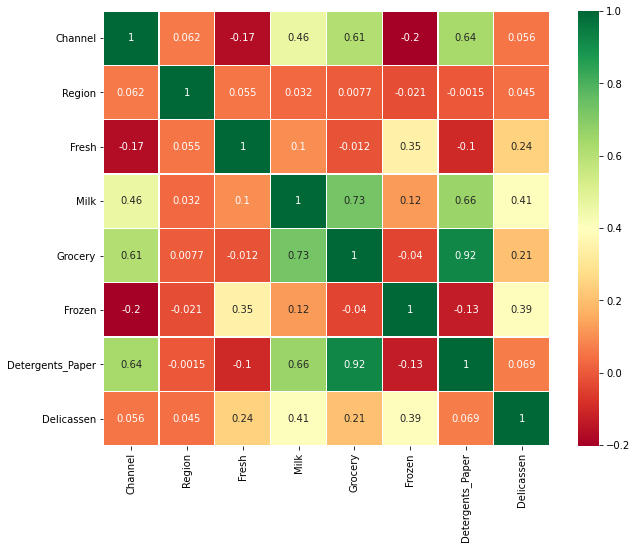

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

Note : Here we can see some higher correlation between Grocery, Milk and Detergents_Paper. So, if we required to improve this model at sometime then we'll focus on this and we can remove one or two from them and test.

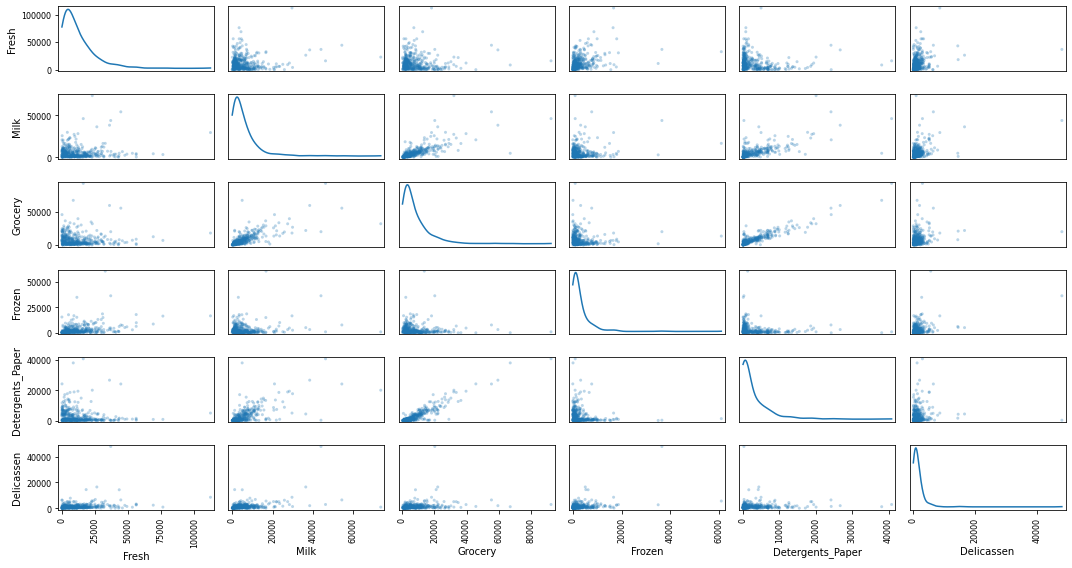

In [ ]:
pd.plotting.scatter_matrix(df, alpha=0.3,figsize=(15,8),diagonal='kde' )
plt.tight_layout() # To avoid overlapping of plots

According to these scatter plots it implies that there would not be very clear clusters. Sometimes we might have to do some faeture engineering and transformations to get a well scattered data points.
Since our focus is to implemnt the kmeans we'll move on.

#Elbow Method
To decide the k (number of clusters)

In [ ]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

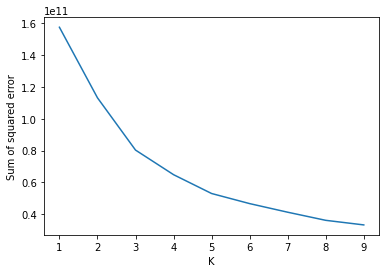

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

As elbow plot shows bends at k=2 , k=3, k=5 we can say that the most suitable k value might be around 3 and 5.

First, try with using k=3 and get the cluster labels.

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df)
y_predicted

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 2, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 2, 1, 1, 0, 0, 2,
       0, 2, 2, 2, 0, 2, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1,
       0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 2, 2, 1, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Now all the predicted cluster labels were added to the data frame.

In [ ]:
df['cluster']=y_predicted
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,2


In [ ]:
km.cluster_centers_

array([[ 8341.61280488,  3779.89329268,  5152.17378049,  2577.23780488,
         1720.57317073,  1136.54268293],
       [ 7751.98113208, 17910.50943396, 27037.90566038,  1970.94339623,
        12104.86792453,  2185.73584906],
       [36156.38983051,  6123.6440678 ,  6366.77966102,  6811.11864407,
         1050.01694915,  3090.05084746]])

In [ ]:
# Record counts in the clusters
frame = pd.DataFrame(df)
frame['cluster'] = y_predicted
frame['cluster'].value_counts()

0    328
2     59
1     53
Name: cluster, dtype: int64

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df2.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
9,6006,11093,18881,1159,7425,2098,1
23,26373,36423,22019,5154,4337,16523,1
28,4113,20484,25957,1158,8604,5206,1
38,4591,15729,16709,33,6956,433,1
43,630,11095,23998,787,9529,72,1


In [ ]:
df2.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.0
mean,7751.981132,17910.509434,27037.905660,1970.943396,12104.867925,2185.735849,1.0
std,8971.193466,12888.506152,14280.589441,2029.579943,7897.636314,2628.169692,0.0
min,37.000000,1275.000000,13567.000000,33.000000,282.000000,3.000000,1.0
25%,1420.000000,10810.000000,19460.000000,787.000000,7108.000000,716.000000,1.0
50%,5283.000000,14069.000000,22272.000000,1274.000000,9836.000000,1423.000000,1.0
75%,10683.000000,21858.000000,28921.000000,2616.000000,14235.000000,2563.000000,1.0
max,44466.000000,73498.000000,92780.000000,10155.000000,40827.000000,16523.000000,1.0


In [ ]:
df1.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.0
mean,8341.612805,3779.893293,5152.173780,2577.237805,1720.573171,1136.542683,0.0
std,6239.384063,3148.534522,4201.722806,3413.101478,2133.026387,1282.351910,0.0
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,0.0
25%,2916.000000,1283.250000,1994.750000,660.750000,232.000000,370.000000,0.0
50%,7211.500000,2795.000000,3414.500000,1386.000000,624.000000,761.000000,0.0
75%,12492.750000,5569.000000,7654.500000,3143.500000,2785.250000,1536.000000,0.0
max,23257.000000,18664.000000,21042.000000,35009.000000,10069.000000,14472.000000,0.0


In [ ]:
df3.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.0
mean,36156.389831,6123.644068,6366.779661,6811.118644,1050.016949,3090.050847,2.0
std,15273.600528,7089.170976,4628.662520,9607.250402,1310.901499,6402.199577,0.0
min,22096.000000,286.000000,471.000000,127.000000,10.000000,3.000000,2.0
25%,26469.500000,2217.500000,2628.500000,1376.500000,261.500000,991.000000,2.0
50%,31012.000000,3965.000000,5091.000000,3881.000000,523.000000,1621.000000,2.0
75%,40487.500000,7168.000000,8266.500000,9050.000000,1126.000000,2884.500000,2.0
max,112151.000000,43950.000000,20170.000000,60869.000000,5058.000000,47943.000000,2.0


# Silhouette Scoring
Using this we can ensure what is the best k value to go with.
Higher the score better the k value.

In [ ]:
range_n_clusters = [2, 3, 4, 5,6]
for n_clusters in range_n_clusters:

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)



For n_clusters = 2 The average silhouette_score is : 0.5115333897970598
For n_clusters = 3 The average silhouette_score is : 0.47640891164620286
For n_clusters = 4 The average silhouette_score is : 0.3866313701382211
For n_clusters = 5 The average silhouette_score is : 0.37871584821733134
For n_clusters = 6 The average silhouette_score is : 0.378244191681007


# For the demonstrating purposes we select only two variables

In [ ]:
df = pd.read_csv("Wholesale customers data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
df.drop(['Channel', 'Region', 'Fresh','Grocery','Detergents_Paper', 'Delicassen'],axis='columns',inplace=True)
df.head()

,Milk,Frozen
0,9656,214
1,9810,1762
2,8808,2405
3,1196,6404
4,5410,3915


In [ ]:
df.columns

Index(['Milk', 'Frozen'], dtype='object')

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df)
y_predicted

array([0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2,
       2, 1, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0,
       2, 0, 0, 1, 2, 0, 2, 2, 2, 0, 2, 2, 1, 0, 2, 2, 2, 1, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
df['cluster']=y_predicted
df.head()

,Milk,Frozen,cluster
0,9656,214,0
1,9810,1762,0
2,8808,2405,0
3,1196,6404,2
4,5410,3915,2


In [ ]:
# Record counts in the clusters
frame = pd.DataFrame(df)
frame['cluster'] = y_predicted
frame['cluster'].value_counts()

0    354
1     78
2      8
Name: cluster, dtype: int64

<function matplotlib.pyplot.show>

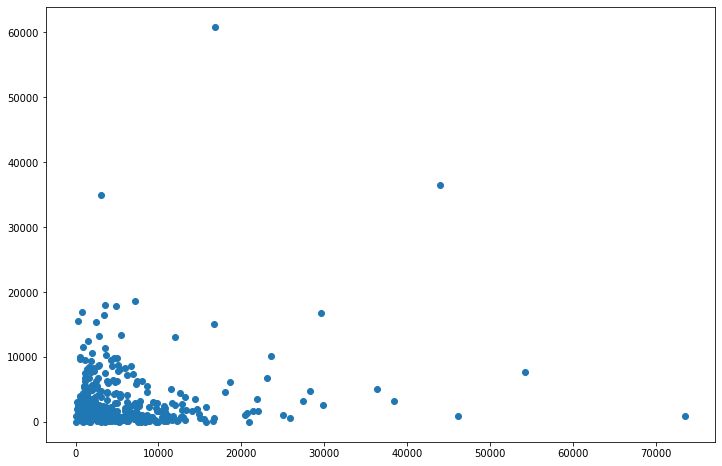

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(df.Milk,df['Frozen'])
plt.show

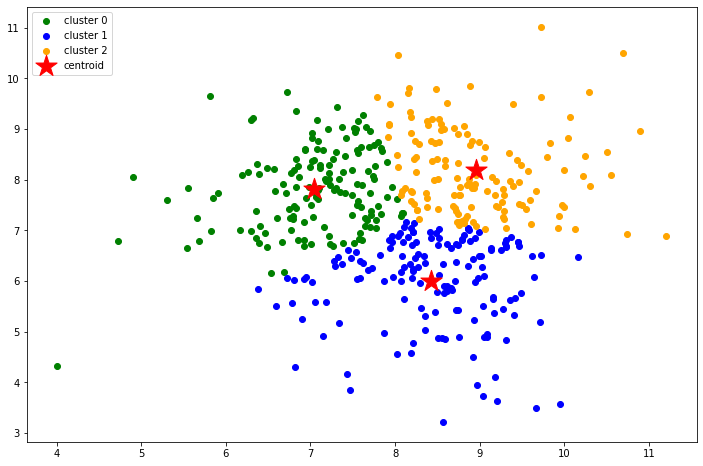

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.figure(figsize=(12,8))
plt.scatter(df1.Milk,df1['Frozen'],color='green',label='cluster 0')
plt.scatter(df2.Milk,df2['Frozen'],color='blue',label='cluster 1')
plt.scatter(df3.Milk,df3['Frozen'],color='orange',label='cluster 2')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=500,color='red',marker='*',label='centroid')
plt.legend()

# Transforming the data to get a good distribution

In [ ]:
df = pd.read_csv("Wholesale customers data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
df.drop(['Channel', 'Region', 'Fresh','Grocery','Detergents_Paper', 'Delicassen'],axis='columns',inplace=True)
df.head()

,Milk,Frozen
0,9656,214
1,9810,1762
2,8808,2405
3,1196,6404
4,5410,3915


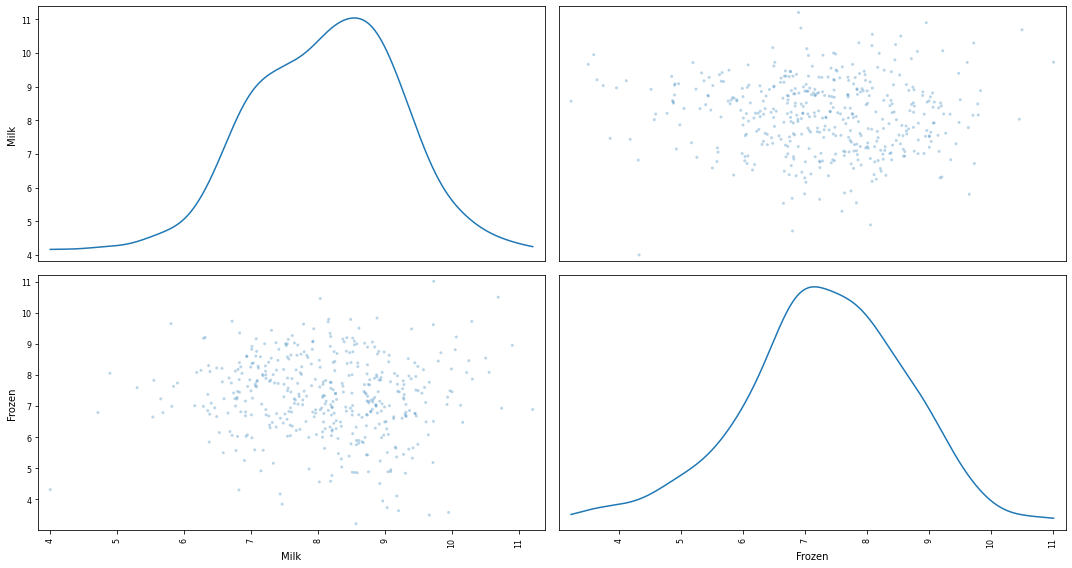

In [ ]:
# Scale the data using the natural logarithm
log_data = np.log(df.copy())

pd.plotting.scatter_matrix(log_data, alpha=0.3,figsize=(15,8),diagonal='kde' )
plt.tight_layout() # To avoid overlapping of plots

In [ ]:
df = log_data

In [ ]:
df.head()

,Milk,Frozen
0,9.175335,5.365976
1,9.191158,7.474205
2,9.083416,7.785305
3,7.086738,8.764678
4,8.596004,8.272571


In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df)
y_predicted

array([1, 2, 2, 0, 2, 1, 1, 2, 1, 2, 2, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 0,
       0, 2, 2, 1, 0, 0, 2, 0, 1, 2, 1, 2, 1, 1, 2, 2, 1, 0, 2, 0, 1, 1,
       1, 2, 2, 2, 1, 2, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 2, 2, 0, 1,
       1, 2, 2, 1, 0, 0, 2, 2, 2, 0, 2, 1, 0, 1, 1, 1, 1, 0, 1, 2, 2, 2,
       0, 2, 0, 2, 2, 2, 1, 1, 1, 0, 0, 0, 2, 2, 2, 2, 0, 0, 1, 2, 1, 1,
       0, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 2, 1, 1, 1, 2, 1, 2, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 2, 2, 2, 1, 1, 0, 0, 2, 1, 1, 1, 0, 1,
       2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 2, 1, 2, 0, 1, 1, 0, 2, 2, 1,
       0, 1, 2, 2, 2, 0, 0, 1, 0, 2, 2, 1, 0, 2, 0, 2, 1, 2, 1, 0, 2, 0,
       0, 1, 0, 0, 0, 1, 2, 0, 0, 2, 2, 2, 1, 1, 0, 2, 0, 2, 0, 0, 2, 0,
       0, 1, 2, 1, 0, 0, 1, 2, 0, 2, 0, 1, 2, 0, 1, 0, 2, 2, 1, 0, 0, 0,
       1, 2, 2, 0, 1, 0, 0, 1, 1, 2, 1, 0, 2, 0, 0, 2, 1, 1, 2, 2, 2, 0,
       0, 0, 0, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,

In [ ]:
df['cluster']=y_predicted
df.head()

,Milk,Frozen,cluster
0,9.175335,5.365976,1
1,9.191158,7.474205,2
2,9.083416,7.785305,2
3,7.086738,8.764678,0
4,8.596004,8.272571,2


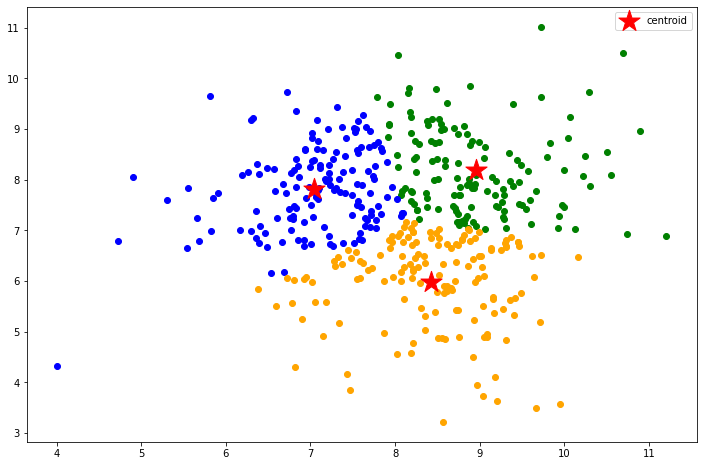

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.figure(figsize=(12,8))
plt.scatter(df1.Milk,df1['Frozen'],color='green')
plt.scatter(df2.Milk,df2['Frozen'],color='blue')
plt.scatter(df3.Milk,df3['Frozen'],color='orange')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=500,color='red',marker='*',label='centroid')
plt.legend()

For n_clusters = 2 The average silhouette_score is : 0.3744906889687231
For n_clusters = 3 The average silhouette_score is : 0.46588856872178763
For n_clusters = 4 The average silhouette_score is : 0.4166650857146324
For n_clusters = 5 The average silhouette_score is : 0.38460229570264187
For n_clusters = 6 The average silhouette_score is : 0.38647227015248975


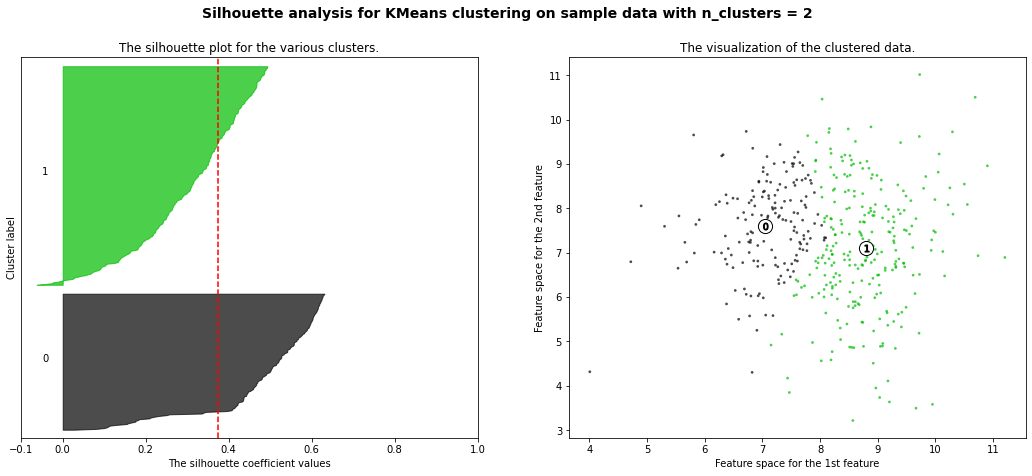

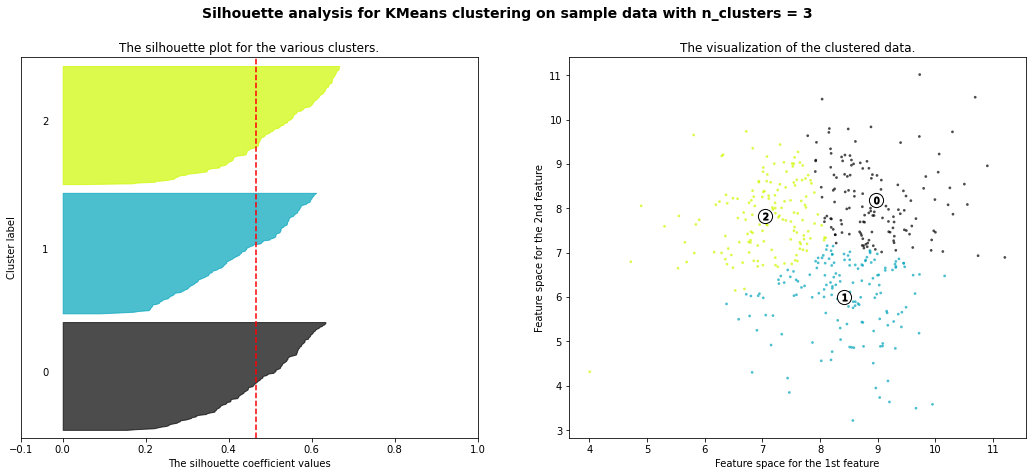

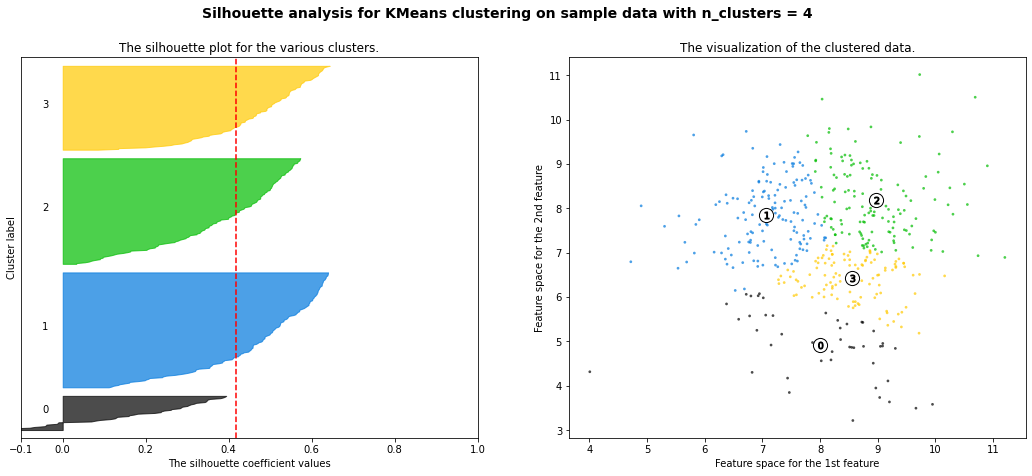

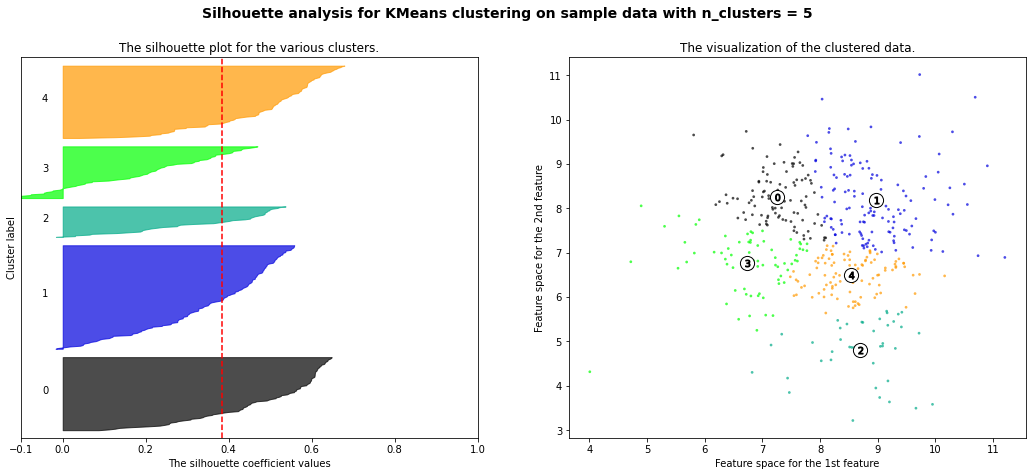

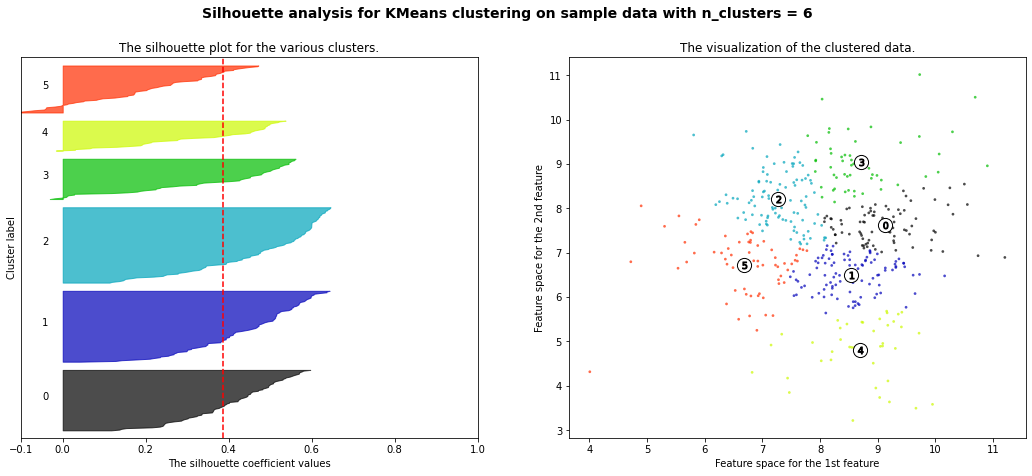

In [ ]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df['Milk'], df['Frozen'], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [ ]:
df.drop(['Detergents_Paper','Milk'],axis='columns',inplace=True)
df.head()

,Fresh,Grocery,Frozen,Delicassen,cluster
0,12669,7561,214,1338,0
1,7057,9568,1762,1776,0
2,6353,7684,2405,7844,0
3,13265,4221,6404,1788,0
4,22615,7198,3915,5185,2


In [ ]:
range_n_clusters = [2, 3, 4, 5,6]
for n_clusters in range_n_clusters:

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.299960346830154
For n_clusters = 3 The average silhouette_score is : 0.25792641172619224
For n_clusters = 4 The average silhouette_score is : 0.19112226429093476
For n_clusters = 5 The average silhouette_score is : 0.20000333041767004
For n_clusters = 6 The average silhouette_score is : 0.19931182295509708


In [ ]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4
count,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-2.422305e-17,-6.030530e-17,1.135455e-17,-8.276208e-17,-6.106227e-17
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-9.496831e-01,-8.373344e-01,-6.283430e-01,-5.402644e-01,-5.411160e-01
25%,-7.023339e-01,-6.108364e-01,-4.804306e-01,-3.964005e-01,-5.411160e-01
50%,-2.767602e-01,-3.366684e-01,-3.188045e-01,-1.985766e-01,-5.411160e-01
75%,3.905226e-01,2.849105e-01,9.946441e-02,1.048598e-01,-1.909821e-01
max,7.927738e+00,8.936528e+00,1.191900e+01,1.647845e+01,2.259955e+00


In [ ]:
range_n_clusters = [2, 3, 4, 5,6]
for n_clusters in range_n_clusters:

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.5853114118012754
For n_clusters = 3 The average silhouette_score is : 0.5262682805457929
For n_clusters = 4 The average silhouette_score is : 0.5422693388012814
For n_clusters = 5 The average silhouette_score is : 0.5518106176376023
For n_clusters = 6 The average silhouette_score is : 0.49109091441204744


In [ ]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000
